In [2]:
import scanpy as sc
import anndata
from anndata import AnnData

import pandas as pd
import numpy as np
import seaborn as sns
import random
import scipy as sci
import scipy.sparse as sps

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(4,4))

In [4]:
from functions import plt_htmp, plt_stat

In [5]:
import shutil
import pickle
import os

def save(var, name):
    if os.path.exists(name+'.pkl'):
        os.remove(name+'.pkl')
    with open(name+'.pkl', 'wb') as f:
        pickle.dump(var, f)
        
def load(name):
    if not os.path.exists(name+'.pkl'):
        raise ValueError(name)
    with open(name+'.pkl', 'rb') as f:
        return pickle.load(f)
    
def flo2str(n): #删除小数点后多余的0并转换为字符
    n = str(n)
    if '.' in n:
        n = n.rstrip('0')  # 删除小数点后多余的0
        if n.endswith('.'):
            n = n.rstrip('.')
    return n    

In [6]:
sd_pth = os.path.join(os.getcwd(), 'simdata')
scenario = ['sp','mix_1','mix_2']
pattern = ['quilt','ggblock','both']

In [7]:
lamb = 10
similarity = ['SNN','SPR']
lambdas = [5,10,18,25,30]
genelist = [0, 52, 96, 129]
multiple = [1, 2, 3, 5]
initial = ['grdtr','rand','nmf','nndsvd','wdgsvd','tcdsvd']

# heatmap

In [12]:
def savepic(pth, name):
    if not os.path.exists(pth):
        os.makedirs(pth)
    pic = pth+'/'+name
    if os.path.exists(pic+'.png'):
        os.remove(pic+'.png')
    plt.savefig(pic, bbox_inches='tight')

In [7]:
for scene in scenario:
    for p in pattern:
        pth = os.path.join(sd_pth,scene,p)
        for gene in genelist:
            plt_htmp.ori_heatmap(wpth=pth, gene=gene, dname='-'+scene+'-'+p, s=8, figsize=(3,2))
            for spr in [75,85,95]:
                spr_pth = os.path.join(pth, str(spr))
                plt_htmp.dataSPR_heatmap(wpth=spr_pth, gene=gene, dname='-'+str(spr)+'%-'+scene+'-'+p, s=8, figsize=(5.1,2.4))

In [ ]:
for scene in scenario:
    for p in pattern:
        pth = os.path.join(sd_pth,scene,p)
        for spr in [75,85,95]:#稀疏度
            spr_pth = os.path.join(pth, str(spr))
            if spr==95:
                wlist = [0.1, 0.2, 0.5]
            else:
                wlist = [0.2, 0.5, 0.7]
            dim_w = load(spr_pth+'/dim_wedge')
            dlist = list(map(lambda x:min(dim_w * x, 30), multiple))
            for gene in genelist:
                for dim in dlist:
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='w', paraset='d', 
                                                 checklist=wlist, setvalue=dim, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SPR', initial=initial)
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='w', paraset='d', 
                                                 checklist=wlist, setvalue=dim, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SNN', initial=initial)
                for w in wlist:
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='d', paraset='w', 
                                                 checklist=dlist, setvalue=w, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SPR', initial=initial)
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='d', paraset='w', 
                                                 checklist=dlist, setvalue=w, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SNN', initial=initial)

In [118]:
        scene = 'mix_1'
        p = 'both'
        pth = os.path.join(sd_pth,scene,p)
        for spr in [95]:#稀疏度
            spr_pth = os.path.join(pth, str(spr))
            if spr==95:
                wlist = [0.1, 0.2, 0.5]
            else:
                wlist = [0.2, 0.5, 0.7]
            dim_w = load(spr_pth+'/dim_wedge')
            dlist = list(map(lambda x:min(dim_w * x, 30), multiple))
            for gene in genelist:
                for dim in dlist:
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='w', paraset='d', 
                                                 checklist=wlist, setvalue=dim, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SPR', initial=initial)
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='w', paraset='d', 
                                                 checklist=wlist, setvalue=dim, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SNN', initial=initial)
                for w in wlist:
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='d', paraset='w', 
                                                 checklist=dlist, setvalue=w, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SPR', initial=initial)
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='d', paraset='w', 
                                                 checklist=dlist, setvalue=w, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SNN', initial=initial)

In [54]:
        scene = 'mix_2'
        p = 'quilt'
        pth = os.path.join(sd_pth,scene,p)
        for spr in [95]:#稀疏度
            spr_pth = os.path.join(pth, str(spr))
            if spr==95:
                wlist = [0.1, 0.2, 0.5]
            else:
                wlist = [0.2, 0.5, 0.7]
            dim_w = load(spr_pth+'/dim_wedge')
            dlist = list(map(lambda x:min(dim_w * x, 30), multiple))
            for gene in genelist:
                for dim in dlist:
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='w', paraset='d', 
                                                 checklist=wlist, setvalue=dim, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SPR', initial=initial)
                    
                for w in wlist:
                    plt_htmp.paraCompare_heatmap(wpth=spr_pth, paracheck='d', paraset='w', 
                                                 checklist=dlist, setvalue=w, gene=gene, 
                                                 dname='-'+scene+'-'+p, s=8, unitfigsz=(2.5,1.8), 
                                                 sim='SPR', initial=initial)
                    

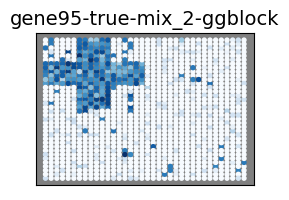

In [131]:
scene = 'mix_2'
p = 'ggblock'
pth = os.path.join(sd_pth,scene,p)
ori_heatmap(wpth=pth, gene=95, gname=None, plt_save=True, plt_show=True, dname='-'+scene+'-'+p, s=8, figsize=(2.8,2))

In [9]:
plt_htmp.simCompare_heatmap(wpth=wpth+'/85', w=0.5, dim=21, gene=0, similar=similar, 
                       dname='-85', s=6, unitfigsz=(2.72,1.7))

In [171]:
sd_pth = os.path.join(os.getcwd(), 'simdata')
qui = os.path.join(sd_pth,'sp','quilt')
gg = os.path.join(sd_pth,'sp','ggblock')
spaq = load(qui+'/spa')
spag = load(gg+'/spa')
facq = load(qui+'/spfac')
facg = load(gg+'/spfac')

In [172]:
def savepic(pth, name):
    if not os.path.exists(pth):
        os.makedirs(pth)
    pic = pth+'/'+name
    if os.path.exists(pic+'.png'):
        os.remove(pic+'.png')
    plt.savefig(pic, bbox_inches='tight')

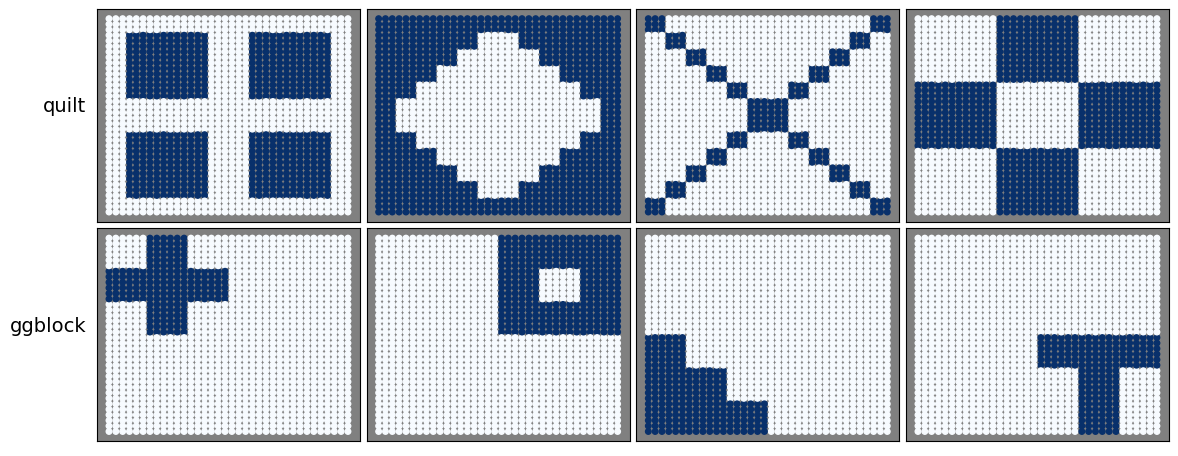

In [173]:
unitfigsz=(3,2.5)
figsize = (4*unitfigsz[0],2*unitfigsz[1])
fig, ax = plt.subplots(2, 4, figsize=figsize, sharex=True, sharey=True)
_=fig.suptitle('')

for j in range(4):
    for i in range(2):
        if i == 0:
            spatial = spaq
            xplot = facq
            if j == 0:
                t=ax[0][0].set_ylabel('quilt',rotation='horizontal', ha='right')
        else:
            spatial = spag
            xplot = facg
            if j == 0:
                t=ax[1][0].set_ylabel('ggblock',rotation='horizontal', ha='right')
        t=ax[i][j].set_facecolor('gray')
        t=ax[i][j].scatter(spatial[:,0],spatial[:,1],c=xplot[:,j],cmap='Blues',s=16)
        i = i + 1
    j = j + 1
_= plt.xticks([])
_= plt.yticks([])
plt.tight_layout(h_pad=0.1, w_pad=0.1)
fig.show()
savepic(sd_pth, 'pattern')

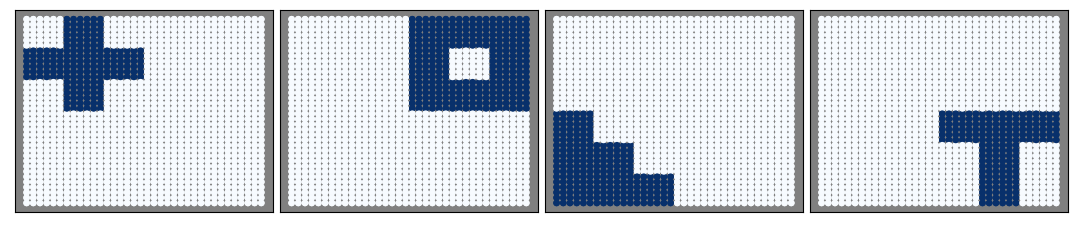

In [181]:
figsize = (11,2.7)
fig, ax = plt.subplots(1, 4, figsize=figsize, sharex=True, sharey=True)
_=fig.suptitle('')

for j in range(4):
    #spatial = spaq
    spatial = spag
    #xplot = facq
    xplot = facg
    t=ax[j].set_facecolor('gray')
    t=ax[j].scatter(spatial[:,0],spatial[:,1],c=xplot[:,j],cmap='Blues',s=14)
    t=ax[j].scatter(spatial[:,0],spatial[:,1],c=xplot[:,j],cmap='Blues',s=14)
    j = j + 1
_= plt.xticks([])
_= plt.yticks([])
plt.tight_layout(h_pad=0.1, w_pad=0.1)
fig.show()
savepic(sd_pth, 'ggpattern')

## statistics

In [77]:
for index in ['_gene', '_cell']:
    for scene in scenario:
        for p in pattern:
            pth = os.path.join(sd_pth,scene,p)
            for spr in [75,85,95]:#稀疏度
                spr_pth = os.path.join(pth,str(spr))
                if spr==95:
                    wlist = [0.1, 0.2, 0.5]
                else:
                    wlist = [0.2, 0.5, 0.7]
                dim_w = load(spr_pth+'/dim_wedge')
                dlist = list(map(lambda x:min(dim_w * x, 30), multiple))
                for d in dlist:
                    plt_stat.initPARAsim_scatter(wpth=spr_pth, indicator='cmd'+index, paracheck='w',
                                         paraset='d', checklist=wlist, setvalue=d, initial=initial,
                                         dname='-'+scene+'-'+p, similarity=similarity)
                    for sim in similarity:
                        plt_stat.paraCompare_boxplot(wpth=spr_pth, indicator='pcc'+index, paracheck='w', 
                                             paraset='d', checklist=wlist, setvalue=d, sim=sim, 
                                             dname='-'+scene+'-'+p, initial=initial)
                for w in wlist:
                    plt_stat.initPARAsim_scatter(wpth=spr_pth, indicator='cmd'+index, paracheck='d',
                                         paraset='w', checklist=dlist, setvalue=w, initial=initial,
                                         dname='-'+scene+'-'+p, similarity=similarity)
                    for sim in similarity:
                        plt_stat.paraCompare_boxplot(wpth=spr_pth, indicator='pcc'+index, paracheck='d', 
                                             paraset='w', checklist=dlist, setvalue=w, sim=sim, 
                                             dname='-'+scene+'-'+p, initial=initial)

In [ ]:
def initPARAsim_scatter(wpth, indicator, paracheck='w', paraset='d', checklist=[0.2,0.5,0.7], 
                    setvalue=7, dname='', s=200, lamb=10, plt_show=False, plt_save=True, 
                     similarity=['SNN','SPR'], initial=['rand','nmf','fac','nndsvd','wegsvd','tcdsvd']):
    # indicator = ['cmd_gene', 'cmd_cell']

    color2 = ['#FFA500','#1047A9']
    color3 = ['#FFE500','#FF8E00','#1921B1']
    color4 = ['#FFBB00','#FF8C00','#0969A2','#1924B1']
    clength = len(checklist)
    marker2 = ['^', 'o']
    marker3 = ['^', 'o', '*']
    mlength = len(similarity)
    if mlength == 2:
        marker = marker2
        if clength == 2:
            color = color2
            xdeviate = [-0.6, -0.2, 0.2, 0.6]
        elif clength == 3:
            color = color3
            xdeviate = [-0.6, -0.36, -0.12, 0.12, 0.36, 0.6]
        elif clength == 4:
            color = color4
            xdeviate = [-1.12, -0.8, -0.48, -0.16, 0.16, 0.48, 0.8, 1.12]
        else:
            raise ValueError('can only compare limited number of parameters')
    elif mlength == 3:
        marker = marker3
        if clength == 2:
            color = color2
            xdeviate = [-0.6, -0.36, -0.12, 0.12, 0.36, 0.6]
        elif clength == 3:
            color = color3
            xdeviate = [-0.6, -0.45, -0.3, -0.15, 0, 0.15, 0.3, 0.45, 0.6]
        else:
            raise ValueError('can only compare limited number of parameters')
    else:
        raise ValueError('can only compare limited number of parameters')
            
    map_xaxis = {}
    map_color = {}
    map_marker = {}
    map_xaxis_m = {}
    i = 0
    for init in initial:
        map_xaxis[init] = 3 * i + 1.5
        i = i + 1
    xrlim =  3 * i
    i = 0
    for check in checklist:
        map_color[check] = color[i]
        i = i + 1
    i = 0
    for sim in similarity:
        map_marker[sim] = marker[i]
        pd_v = xdeviate[clength*i: clength*(i+1)]
        para_deviate = {}
        j = 0
        for check in checklist:
            para_deviate[check] = pd_v[j]
            j = j + 1
        map_xaxis_m[sim] = para_deviate
        i = i + 1

    df = pd.DataFrame()
    indi_v = []
    init_v = []
    check_v = []
    simi_v = []
    for check in checklist:
        if paracheck=='w' and paraset=='d':
            file = 'w'+flo2str(check)+'-l'+flo2str(lamb)+'-d'+flo2str(setvalue)
        elif paracheck=='d' and paraset=='w':
            file = 'w'+flo2str(setvalue)+'-l'+flo2str(lamb)+'-d'+flo2str(check)
        i = 0
        for init in initial:
            res_pth = os.path.join(wpth, 'result', init, file)
            for sim in similarity:
                stat_pth = os.path.join(res_pth, sim, 'statistics')
                indi_v.append(load(stat_pth+'/'+indicator+'_'+sim))
                init_v.append(init)
                check_v.append(check)
                simi_v.append(sim)
    df[indicator] = indi_v
    df['initial'] = init_v
    df[paracheck] = check_v
    df['similarity'] = simi_v
    df['sim-para'] = df[['similarity',paracheck]].values.tolist()
    
    df_plot = df.copy()
    x1 = np.array(list(map(lambda x: map_xaxis[x], df_plot['initial'])))
    x2 = np.array(list(map(lambda x: map_xaxis_m[x[0]][x[1]], df_plot['sim-para'])))
    df_plot['xaxis'] = x1 + x2
    df_plot['maker'] = list(map(lambda x: map_marker[x], df_plot['similarity']))
    df_plot['color'] = list(map(lambda x: map_color[x], df_plot[paracheck]))
    
    patch = []
    for value in map_marker.values():
        p = plt.scatter([20], [indi_v[0]], color='black', marker=value, s=150)
        patch.append(p)
    lgd_m = plt.legend(patch, similarity, loc=3, bbox_to_anchor=(1., 0.6))
    for sim in similarity:
        legend = []
        label = []
        for check in checklist:
            label.append(sim+'-'+paracheck+str(check))
            df_sub = df_plot.loc[df_plot['similarity']==sim]
            df_sub = df_sub.loc[df_sub[paracheck]==check]
            plt.scatter(df_sub['xaxis'], df_sub[indicator], 
                                   color=map_color[check], marker=map_marker[sim], s=s)
    patch = []
    for key, value in map_color.items():
        p = mpatches.Patch(color=value, label=paracheck+str(key))
        patch.append(p)
    lgd_c = plt.legend(handles=patch, loc=3, bbox_to_anchor=(1.,0.1))
    _= plt.gca().add_artist(lgd_m)
    
    _=plt.grid(False)
    for vline in range(1, len(initial)):
        plt.axvline(3*vline,ls='--',c="gray")#添加垂直直线
    _= plt.xlim([0,xrlim])
    
    _= plt.xticks(list(map_xaxis.values()), initial, rotation=30)
    pictit = paraset+flo2str(setvalue)+'-l'+flo2str(lamb)
    _= plt.title(indicator+'-'+pictit+dname)

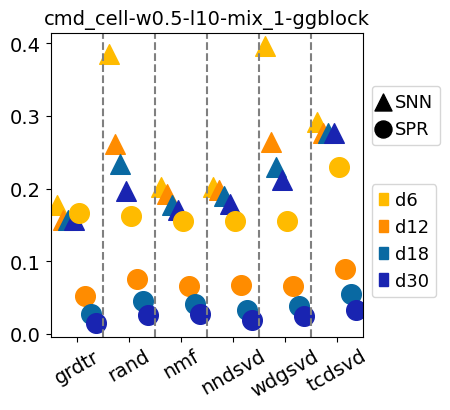

In [134]:
scene = 'mix_1'
p = 'ggblock'
pth = os.path.join(sd_pth,scene,p,'75')
initPARAsim_scatter(wpth=pth, indicator='cmd_cell', paracheck='d',
                                         paraset='w', checklist=[6,12,18,30], setvalue=0.5, initial=initial,
                                         dname='-'+scene+'-'+p, similarity=similarity)

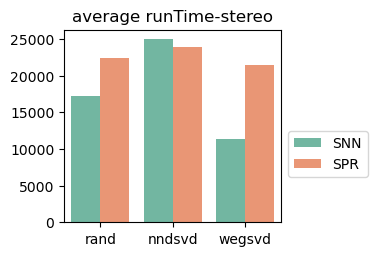

In [ ]:
plt_stat.time_barplot(wpth=sd_pth, dname='-simulations', plt_show=True)

# lambda

In [18]:
lambdas=[5,10,18,25,30]

In [13]:
#sp-quilt
spqwpth = os.path.join(sd_pth,'sp','quilt')
spq_dict = {'75%':{'pth':spqwpth+'/75', 'w':0.5, 'd':12}, 
           '85%':{'pth':spqwpth+'/85', 'w':0.5, 'd':8}, 
           '95%':{'pth':spqwpth+'/95', 'w':0.1, 'd':6}}

In [10]:
for indi in ['pcc_cell','pcc_gene']:
    plt_stat.lambCompare_boxplot(pth_dict=spq_dict, pic_pth=spqwpth, 
                                 indicator=indi, lambdas=lambdas, dname='sp-quilt')
for indi in ['cmd_cell','cmd_gene']:
    plt_stat.lambCompare_barplot(pth_dict=spq_dict, pic_pth=spqwpth, 
                                 indicator=indi, lambdas=lambdas, dname='sp-quilt')
i = 0
for gene in genelist:
    plt_htmp.lambCompare_heatmap(pth_dict=spq_dict, pic_pth=spqwpth, gene=gene,
                                 lambdas=lambdas, dname='sp-quilt', s=5, unitfigsz=(2.2,1.6))
    i = i + 1

In [14]:
#mix_1-ggblock
m1gwpth = os.path.join(sd_pth,'mix_1','ggblock')
m1g_dict = {'75%':{'pth':m1gwpth+'/75', 'w':0.5, 'd':12}, 
           '85%':{'pth':m1gwpth+'/85', 'w':0.5, 'd':12}, 
           '95%':{'pth':m1gwpth+'/95', 'w':0.2, 'd':6}}

In [15]:
for indi in ['pcc_cell','pcc_gene']:
    plt_stat.lambCompare_boxplot(pth_dict=m1g_dict, pic_pth=m1gwpth, 
                                 indicator=indi, lambdas=lambdas, dname='mix_1-ggblock')
for indi in ['cmd_cell','cmd_gene']:
    plt_stat.lambCompare_barplot(pth_dict=m1g_dict, pic_pth=m1gwpth, 
                                 indicator=indi, lambdas=lambdas, dname='mix_1-ggblock')
i = 0
for gene in genelist:
    plt_htmp.lambCompare_heatmap(pth_dict=m1g_dict, pic_pth=m1gwpth, gene=gene,
                                 lambdas=lambdas, dname='mix_1-ggblock', s=2, unitfigsz=(2.2,1.6))
    i = i + 1

In [16]:
#mix_2-both
m2bwpth = os.path.join(sd_pth,'mix_2','both')
m2b_dict = {'75%':{'pth':m2bwpth+'/75', 'w':0.5, 'd':30}, 
           '85%':{'pth':m2bwpth+'/85', 'w':0.5, 'd':20}, 
           '95%':{'pth':m2bwpth+'/95', 'w':0.2, 'd':15}}

In [17]:
for indi in ['pcc_cell','pcc_gene']:
    plt_stat.lambCompare_boxplot(pth_dict=m2b_dict, pic_pth=m2bwpth, 
                                 indicator=indi, lambdas=lambdas, dname='mix_2-both')
for indi in ['cmd_cell','cmd_gene']:
    plt_stat.lambCompare_barplot(pth_dict=m2b_dict, pic_pth=m2bwpth, 
                                 indicator=indi, lambdas=lambdas, dname='mix_2-both')
i = 0
for gene in genelist:
    plt_htmp.lambCompare_heatmap(pth_dict=m2b_dict, pic_pth=m2bwpth, gene=gene,
                                 lambdas=lambdas, dname='mix_2-both', s=2, unitfigsz=(2.2,1.6))
    i = i + 1

# Best

### sp

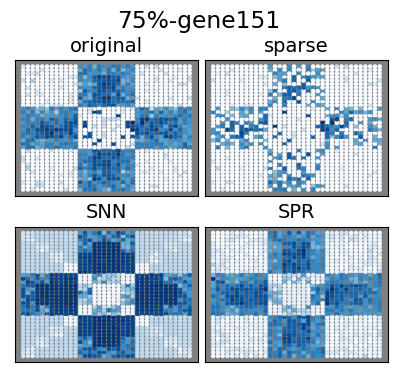

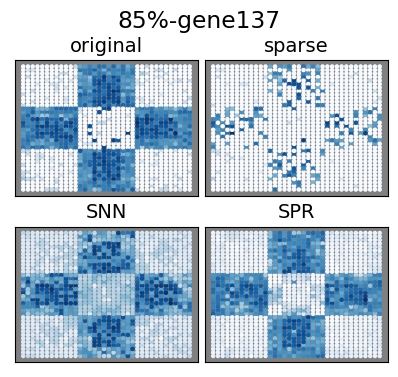

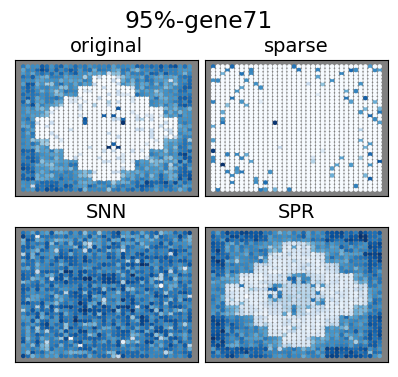

In [9]:
scene = 'sp'
p = 'quilt'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.5, 'd':12}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':8}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.1, 'd':6}}

savename=scene+'-'+p
#glist = random.sample(range(200),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename, plt_show=True)

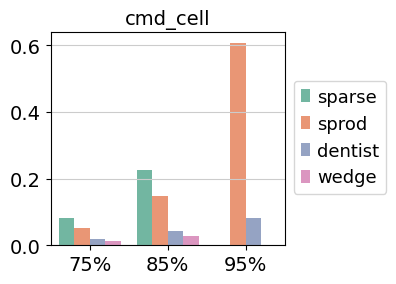

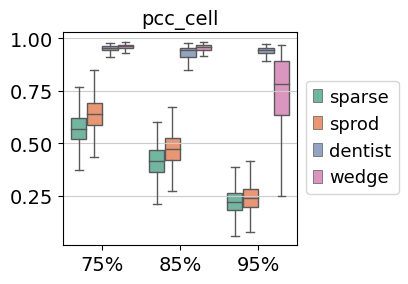

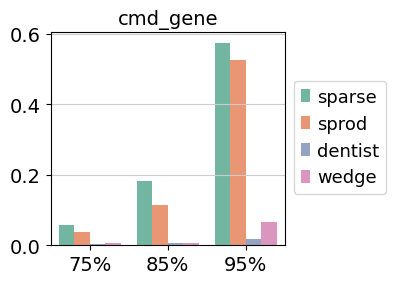

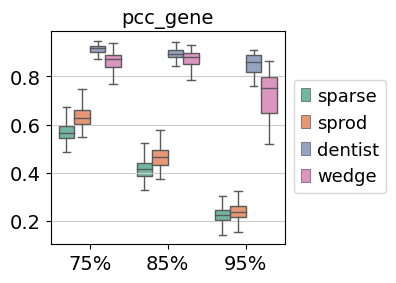

In [321]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

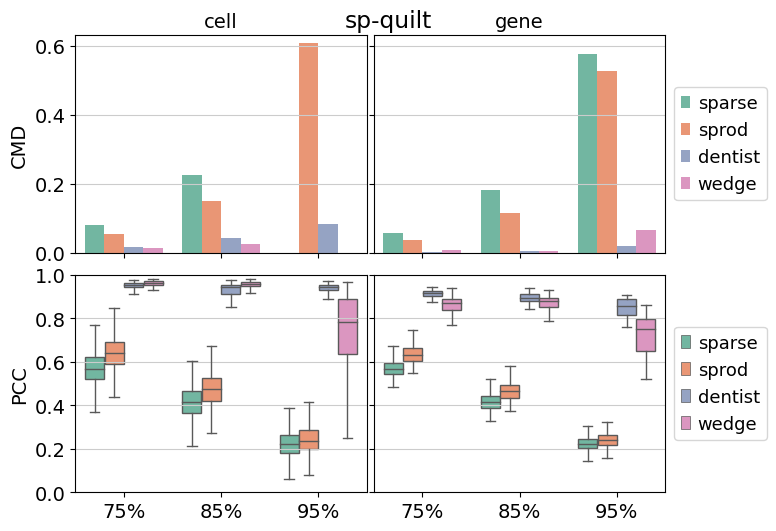

In [8]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.63, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

In [10]:
scene = 'sp'
p = 'ggblock'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.7, 'd':12}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.7, 'd':12}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.2, 'd':8}}

savename=scene+'-'+p
#glist = random.sample(range(200),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

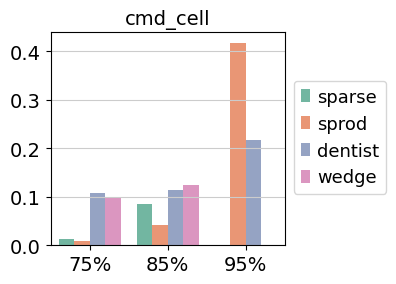

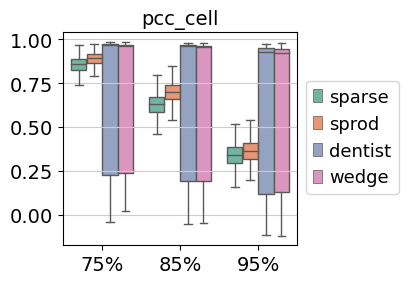

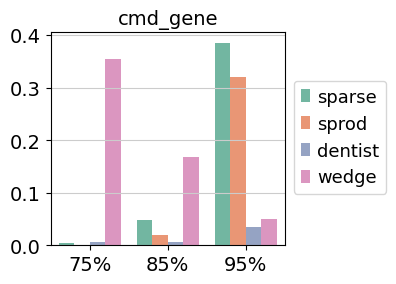

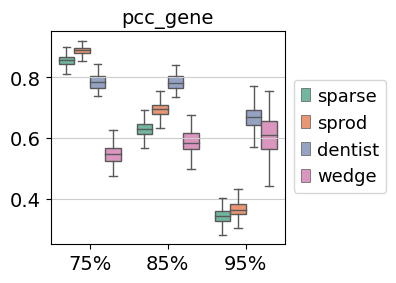

In [329]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

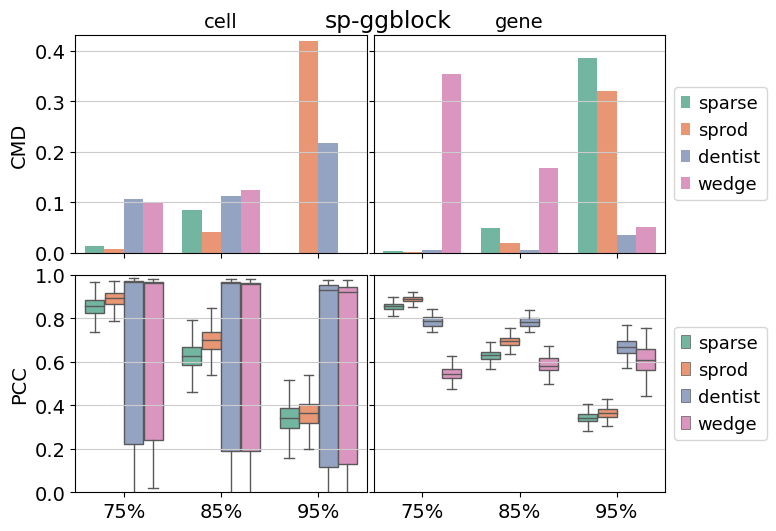

In [10]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.43, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

In [11]:
scene = 'sp'
p = 'both'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.5, 'd':16}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':16}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.1, 'd':9}}
savename=scene+'-'+p
#glist = random.sample(range(200),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

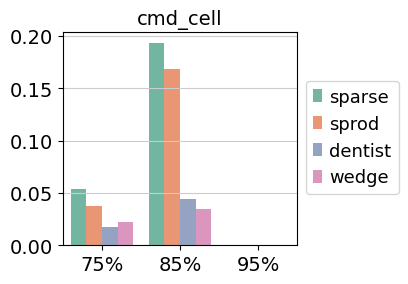

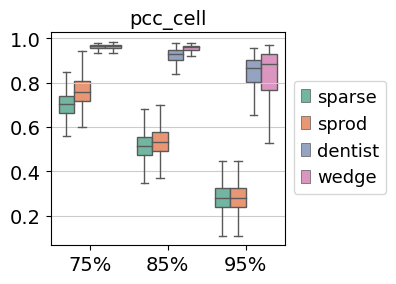

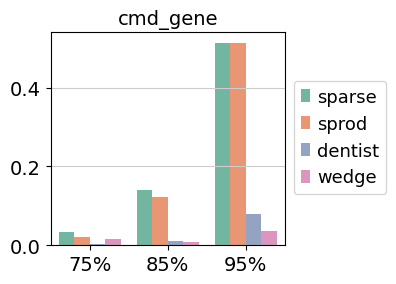

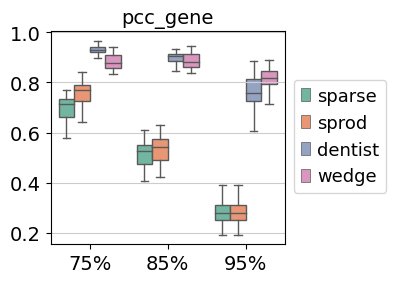

In [12]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

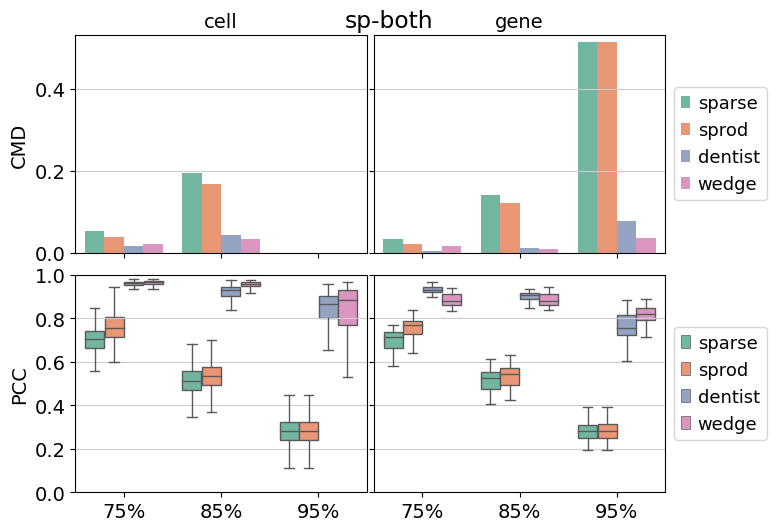

In [14]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.53, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

### mix_1

In [12]:
scene = 'mix_1'
p = 'quilt'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.5, 'd':12}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':12}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.1, 'd':6}}

savename=scene+'-'+p
#glist = random.sample(range(500),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

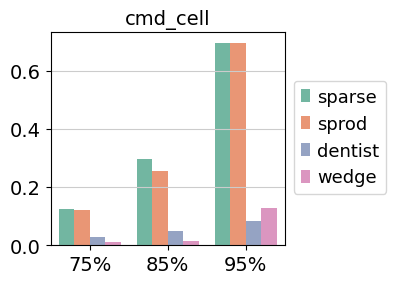

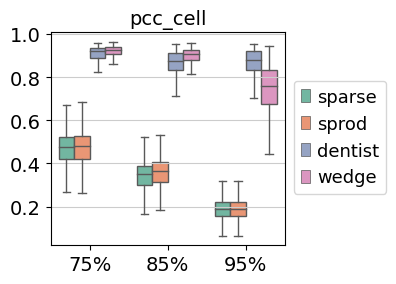

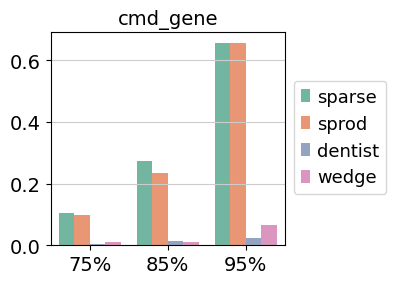

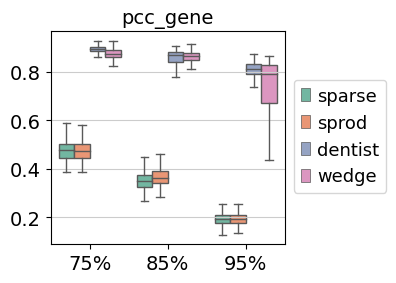

In [16]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

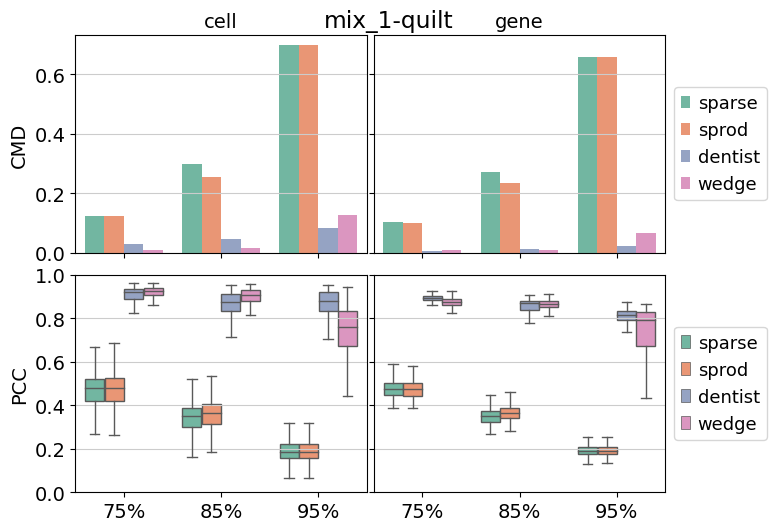

In [19]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.73, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

In [13]:
scene = 'mix_1'
p = 'ggblock'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.5, 'd':12}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':12}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.2, 'd':6}}

savename=scene+'-'+p
#glist = random.sample(range(500),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

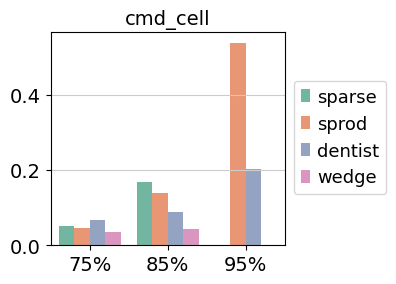

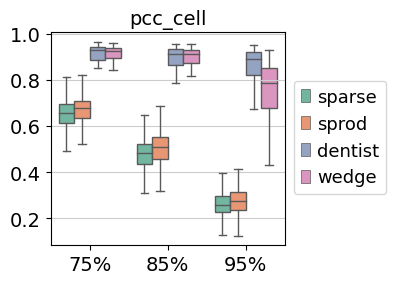

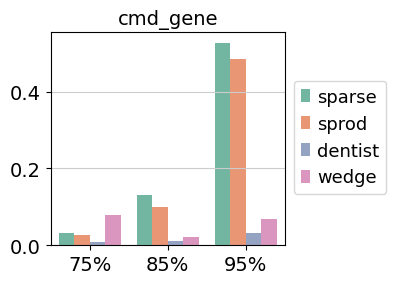

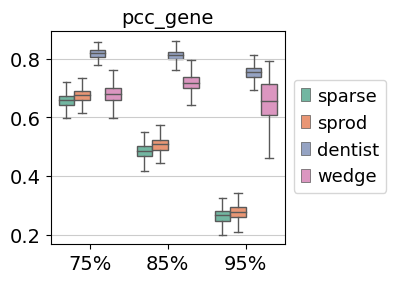

In [21]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

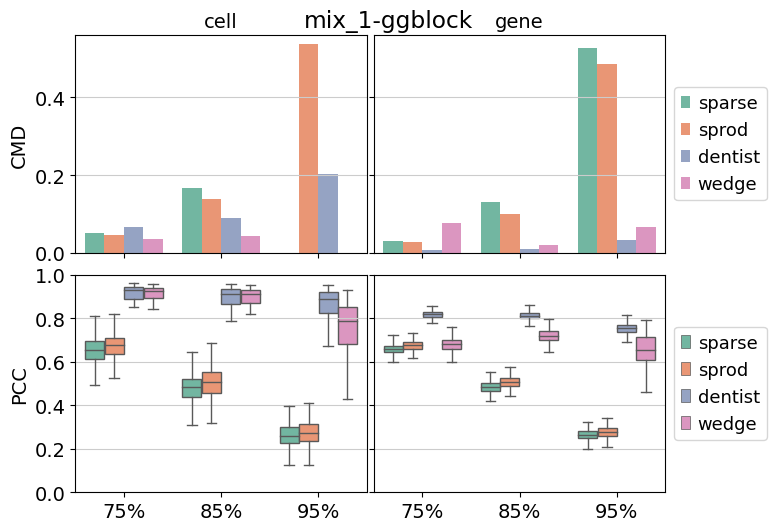

In [23]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.56, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

In [14]:
scene = 'mix_1'
p = 'both'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.5, 'd':20}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':20}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.2, 'd':15}}

savename=scene+'-'+p
#glist = random.sample(range(500),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

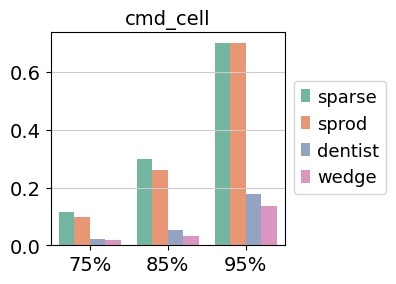

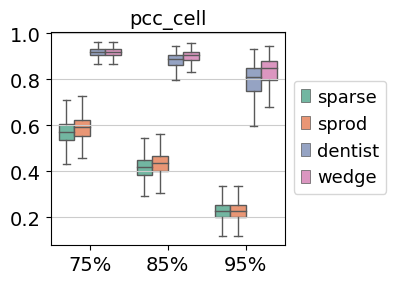

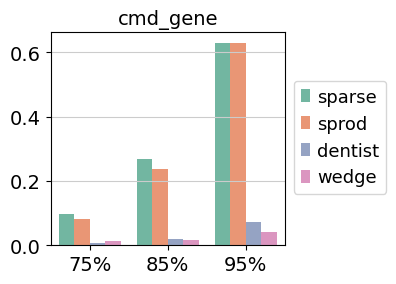

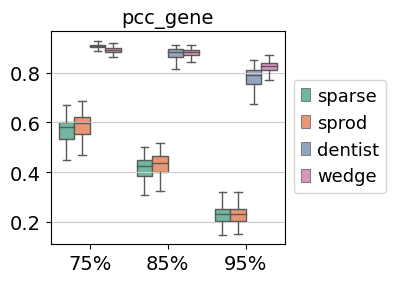

In [25]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

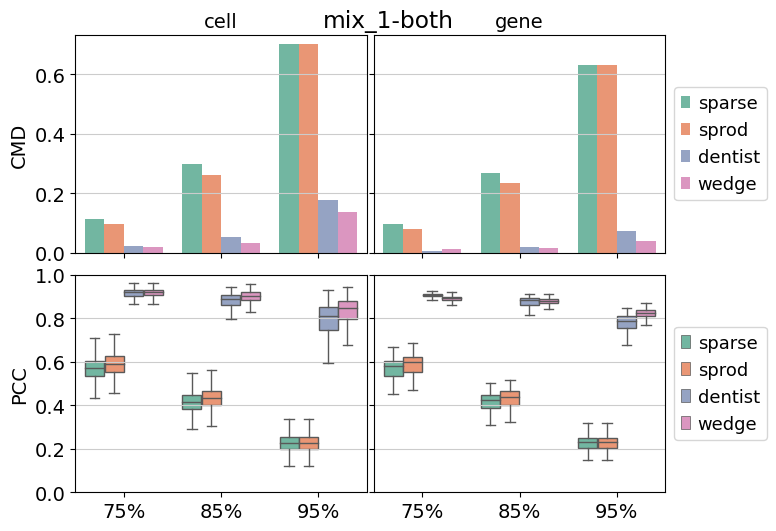

In [28]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.73, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

### mix_2

In [15]:
scene = 'mix_2'
p = 'quilt'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.5, 'd':14}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':14}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.1, 'd':12}}

savename=scene+'-'+p
#glist = genelist#random.sample(range(500),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

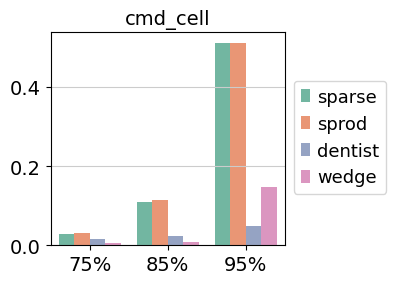

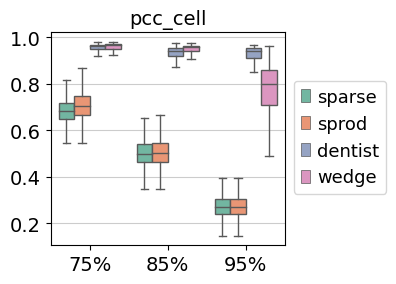

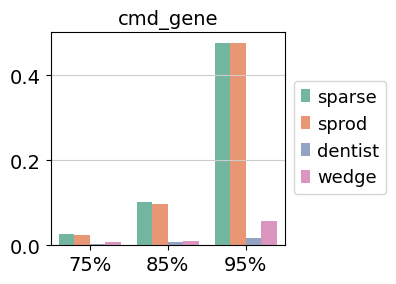

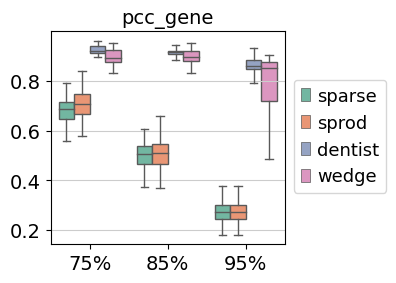

In [30]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

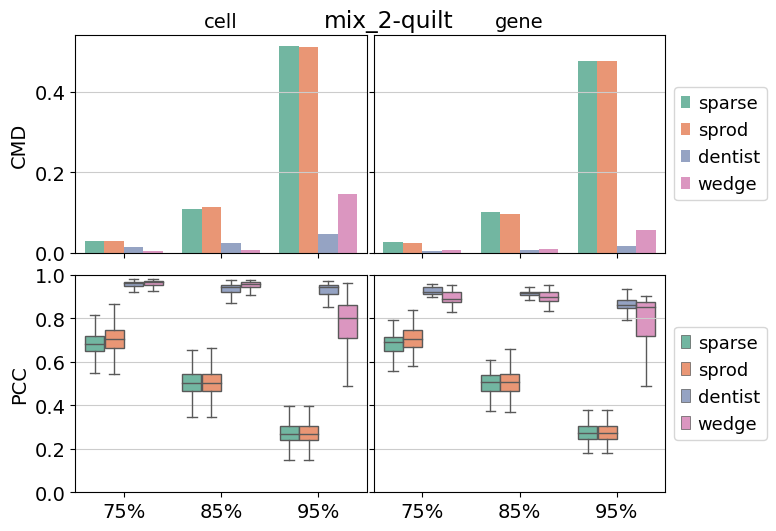

In [32]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.54, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

In [16]:
scene = 'mix_2'
p = 'ggblock'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.7, 'd':21}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':21}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.2, 'd':21}}

savename=scene+'-'+p
#glist = genelist#random.sample(range(500),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

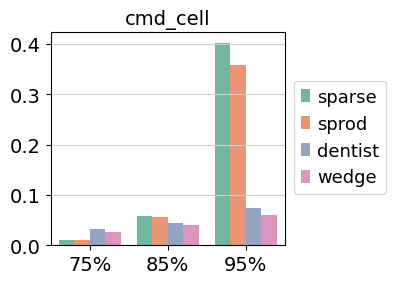

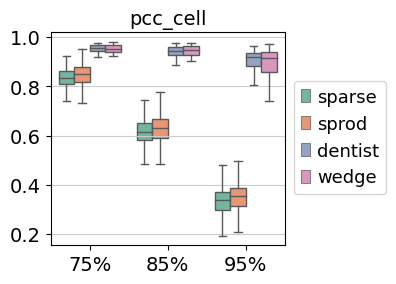

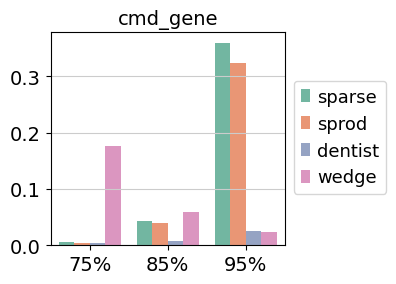

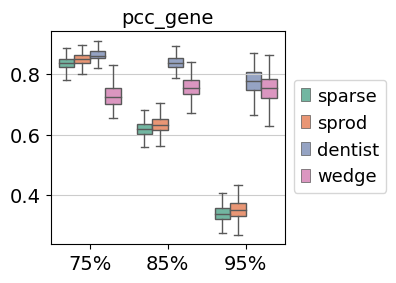

In [34]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

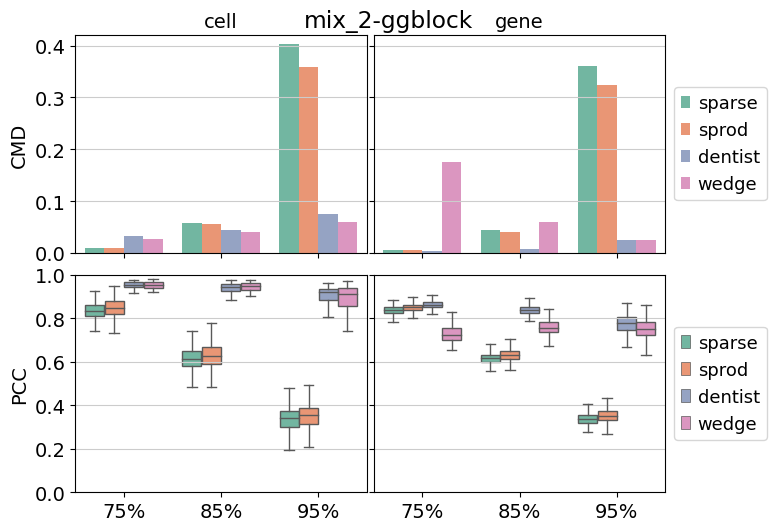

In [35]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.42, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

In [17]:
scene = 'mix_2'
p = 'both'
pth = os.path.join(sd_pth,scene,p)

pth_dict = {'75%':{'pth':os.path.join(pth,'75'),
                        'w':0.5, 'd':30}, 
           '85%':{'pth':os.path.join(pth,'85'),
                       'w':0.5, 'd':20}, 
           '95%':{'pth':os.path.join(pth,'95'),
                       'w':0.2, 'd':15}}

savename=scene+'-'+p
#glist = genelist#random.sample(range(500),4)
plt_htmp.multiOri_heatmap(wpth=pth, glist=glist, dname=savename, pad=0.94, 
                        s=5, unitfigsz=(2.65, 1.7), pic_pth=sd_pth)

for key, value in pth_dict.items():
    wpth = value['pth']
    w = value['w']
    d = value['d']
    plt_htmp.methods_heatmap(wpth=wpth, w=w, d=d, pic_pth=sd_pth, glist=glist, sparse=True,
                             savename=savename, dname=key, s=5, unitfigsz=(2.15,1.75))
    plt_htmp.simCompare_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200), 
                                figsize=(4.37,2.61), dname=key, s=5, savename=savename, 
                                unitfigsz=(2.3,1.6), initial=initial)
    plt_htmp.sim_heatmap(wpth=wpth, w=w, dim=d, pic_pth=sd_pth, gene=random.randint(0,200),
                         dname=key, s=5, unitfigsz=(2.1,2.1), savename=savename)

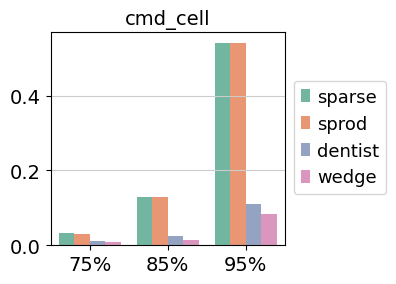

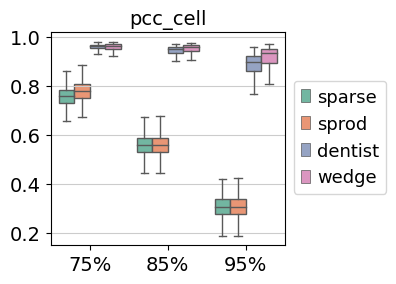

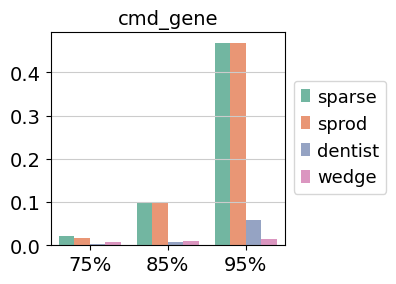

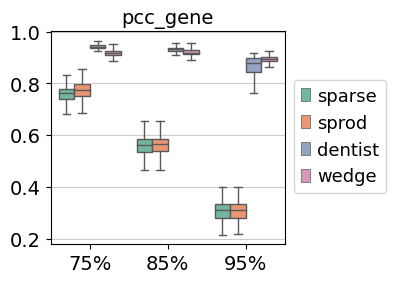

In [69]:
for aff in ['_cell', '_gene']:
    plt_stat.methodCompare_barplot(pth_dict=pth_dict, indicator='cmd'+aff, pic_pth=sd_pth,
                                plt_save=False, plt_show=True, figsize=(3,2.8))
    plt_stat.methodCompare_boxplot(pth_dict=pth_dict, indicator='pcc'+aff, pic_pth=sd_pth, 
                                plt_save=False, plt_show=True, figsize=(3,2.8))

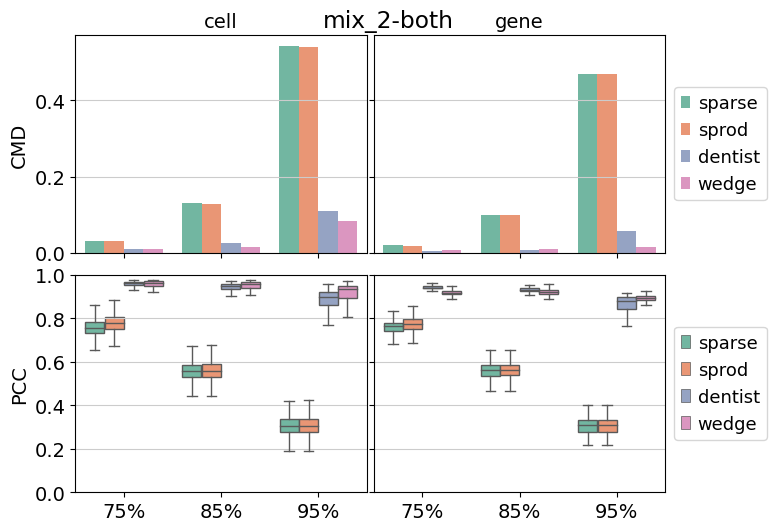

In [39]:
plt_stat.statCombine(pth_dict=pth_dict, dname=savename, cmdhigh=0.57, 
                     pcclim=[0,1], pic_pth=sd_pth, plt_show=True)

In [ ]:
#w_choose

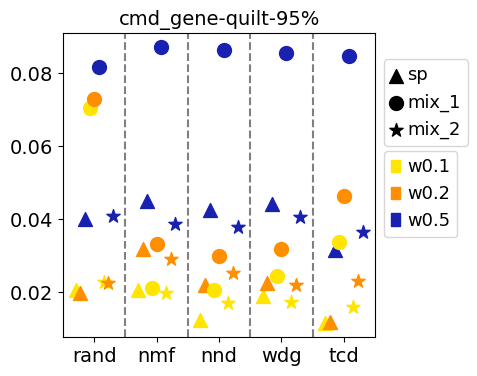

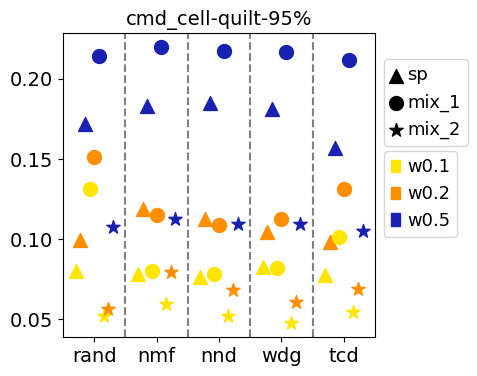

In [51]:
pattern = 'quilt'
sparse = '95'

sqpth = os.path.join(sd_pth, 'sp', pattern)
mqpth = os.path.join(sd_pth, 'mix_1', pattern)
m2qpth = os.path.join(sd_pth, 'mix_2', pattern)

pth_dict = {'sp':{'pth':os.path.join(sqpth,sparse),
               'd':6},
            'mix_1':{'pth':os.path.join(mqpth,sparse),
               'd':6}, 
           'mix_2':{'pth':os.path.join(m2qpth,sparse),
               'd':12}}

plt_stat.wXsparsity_scatter(indicator='cmd_gene', pth_dict=pth_dict, pic_pth=sd_pth,
                            checklist=[0.1,0.2,0.5], dname=pattern+'-'+sparse+'%',
                            plt_show=True, plt_save=True, 
                            initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd'])
plt_stat.wXsparsity_scatter(indicator='cmd_cell', pth_dict=pth_dict, pic_pth=sd_pth,
                            checklist=[0.1,0.2,0.5], dname=pattern+'-'+sparse+'%',
                            plt_show=True, plt_save=True, 
                            initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd'])

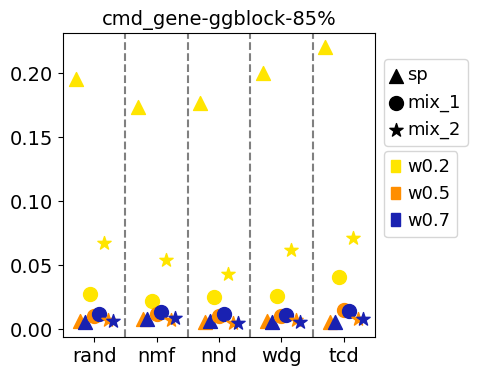

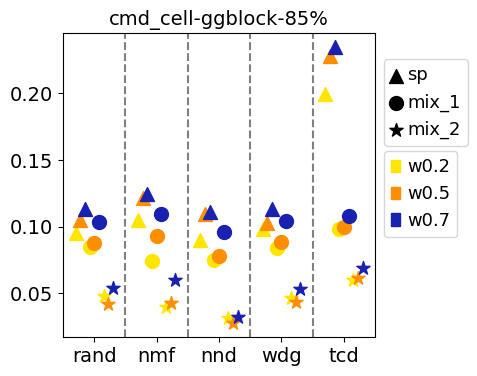

In [52]:
pattern = 'ggblock'
sparse = '85'

sqpth = os.path.join(sd_pth, 'sp', pattern)
mqpth = os.path.join(sd_pth, 'mix_1', pattern)
m2qpth = os.path.join(sd_pth, 'mix_2', pattern)

pth_dict = {'sp':{'pth':os.path.join(sqpth,sparse),
               'd':12},
            'mix_1':{'pth':os.path.join(mqpth,sparse),
               'd':12}, 
           'mix_2':{'pth':os.path.join(m2qpth,sparse),
               'd':21}}

plt_stat.wXsparsity_scatter(indicator='cmd_gene', pth_dict=pth_dict, pic_pth=sd_pth,
                            checklist=[0.2,0.5,0.7], dname=pattern+'-'+sparse+'%',
                            plt_show=True, plt_save=True, 
                            initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd'])
plt_stat.wXsparsity_scatter(indicator='cmd_cell', pth_dict=pth_dict, pic_pth=sd_pth,
                            checklist=[0.2,0.5,0.7], dname=pattern+'-'+sparse+'%',
                            plt_show=True, plt_save=True, 
                            initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd'])

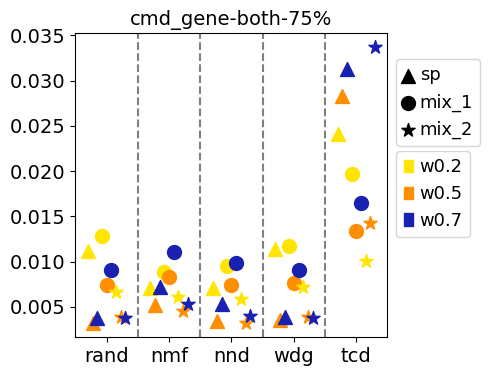

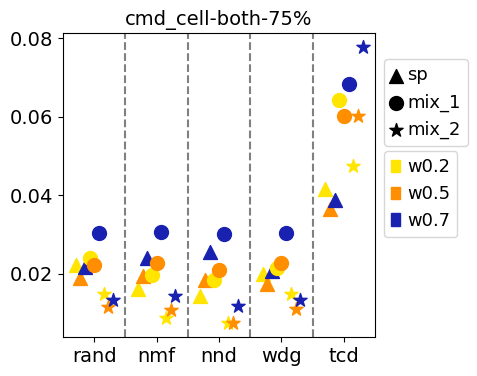

In [53]:
pattern = 'both'
sparse = '75'

sqpth = os.path.join(sd_pth, 'sp', pattern)
mqpth = os.path.join(sd_pth, 'mix_1', pattern)
m2qpth = os.path.join(sd_pth, 'mix_2', pattern)

pth_dict = {'sp':{'pth':os.path.join(sqpth,sparse),
               'd':16},
            'mix_1':{'pth':os.path.join(mqpth,sparse),
               'd':20}, 
           'mix_2':{'pth':os.path.join(m2qpth,sparse),
               'd':30}}

plt_stat.wXsparsity_scatter(indicator='cmd_gene', pth_dict=pth_dict, pic_pth=sd_pth,
                            checklist=[0.2,0.5,0.7], dname=pattern+'-'+sparse+'%',
                            plt_show=True, plt_save=True, 
                            initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd'])
plt_stat.wXsparsity_scatter(indicator='cmd_cell', pth_dict=pth_dict, pic_pth=sd_pth,
                            checklist=[0.2,0.5,0.7], dname=pattern+'-'+sparse+'%',
                            plt_show=True, plt_save=True, 
                            initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd'])

In [56]:
def wXsparsity_scatter(indicator, pth_dict, pic_pth, checklist=[0.2,0.5,0.7],
                        dname='', s=100, lamb=10, plt_show=False, plt_save=True, 
                        initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd']):
    # indicator = ['cmd_gene', 'cmd_cell']
    sim = 'SPR'
    paracheck='w'
    color2 = ['#FFA500','#1047A9']
    color3 = ['#FFE500','#FF8E00','#1921B1']
    color4 = ['#FFBB00','#FF8C00','#0969A2','#1924B1']
    clength = len(checklist)
    marker2 = ['^', 'o']
    marker3 = ['^', 'o', '*']
    mlength = len(pth_dict)
    if mlength == 2:
        marker = marker2
        if clength == 2:
            color = color2
            xdeviate = [-0.6, -0.2, 0.2, 0.6]
        elif clength == 3:
            color = color3
            xdeviate = [-0.6, -0.36, -0.12, 0.12, 0.36, 0.6]
        elif clength == 4:
            color = color4
            xdeviate = [-0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7]
        else:
            raise ValueError('can only compare limited number of parameters')
    elif mlength == 3:
        marker = marker3
        if clength == 2:
            color = color2
            xdeviate = [-0.6, -0.36, -0.12, 0.12, 0.36, 0.6]
        elif clength == 3:
            color = color3
            xdeviate = [-0.6, -0.45, -0.3, -0.15, 0, 0.15, 0.3, 0.45, 0.6]
        else:
            raise ValueError('can only compare limited number of parameters')
    else:
        raise ValueError('can only compare limited number of parameters')
            
    map_xaxis = {}
    map_color = {}
    map_marker = {}
    map_xaxis_m = {}
    i = 0
    for init in initial:
        map_xaxis[init] = 2 * i + 1
        i = i + 1
    xrlim =  2 * i
    i = 0
    for check in checklist:
        map_color[check] = color[i]
        i = i + 1
    i = 0
    for data in pth_dict.keys():
        map_marker[data] = marker[i]
        pd_v = xdeviate[clength*i: clength*(i+1)]
        para_deviate = {}
        j = 0
        for check in checklist:
            para_deviate[check] = pd_v[j]
            j = j + 1
        map_xaxis_m[data] = para_deviate
        i = i + 1

    df = pd.DataFrame()
    indi_v = []
    init_v = []
    check_v = []
    data_v = []
    
    for data, value in pth_dict.items():
        wpth = value['pth']
        dim = value['d']
        for check in checklist:
            file = 'w'+flo2str(check)+'-l'+flo2str(lamb)+'-d'+flo2str(dim)
            for init in initial:
                res_pth = os.path.join(wpth, 'result', init, file)
                stat_pth = os.path.join(res_pth, sim, 'statistics')
                indi_v.append(load(stat_pth+'/'+indicator+'_'+sim))
                init_v.append(init)
                check_v.append(check)
                data_v.append(data)
    df[indicator] = indi_v
    df['initial'] = init_v
    df[paracheck] = check_v
    df['data'] = data_v
    df['data-para'] = df[['data',paracheck]].values.tolist()
    
    df_plot = df.copy()
    x1 = np.array(list(map(lambda x: map_xaxis[x], df_plot['initial'])))
    x2 = np.array(list(map(lambda x: map_xaxis_m[x[0]][x[1]], df_plot['data-para'])))
    df_plot['xaxis'] = x1 + x2
    df_plot['maker'] = list(map(lambda x: map_marker[x], df_plot['data']))
    df_plot['color'] = list(map(lambda x: map_color[x], df_plot[paracheck]))
    
    patch = []
    for value in map_marker.values():
        p = plt.scatter([20], [indi_v[0]], color='black', marker=value, s=100)
        patch.append(p)
    lgd_m = plt.legend(patch, pth_dict.keys(), loc=3, bbox_to_anchor=(1., 0.6))
    for data in pth_dict.keys():
        legend = []
        label = []
        for check in checklist:
            label.append(data+'-'+paracheck+str(check))
            df_sub = df_plot.loc[df_plot['data']==data]
            df_sub = df_sub.loc[df_sub[paracheck]==check]
            plt.scatter(df_sub['xaxis'], df_sub[indicator], 
                                   color=map_color[check], marker=map_marker[data], s=s)
    patch = []
    for key, value in map_color.items():
        p = mpatches.Patch(color=value, label=paracheck+str(key))
        patch.append(p)
    lgd_c = plt.legend(handles=patch, loc=3, bbox_to_anchor=(1.,0.3))
    _= plt.gca().add_artist(lgd_m)
    
    _=plt.grid(False)
    for vline in range(1, len(initial)):
        plt.axvline(2*vline,ls='--',c="gray")#添加垂直直线
    _= plt.xlim([0,xrlim])
    _= plt.ylim([0,0.04])
    tick = ['rand','nmf','nnd','wdg','tcd']
    _= plt.xticks(list(map_xaxis.values()), tick)
    _= plt.title(indicator+'-'+dname)
    
    if plt_save:
        pic_path = os.path.join(pic_pth, 'paper', 'choose_w', dname)
        savepic(pic_path, indicator)
    if plt_show:
        plt.show()
    else:
        plt.close()

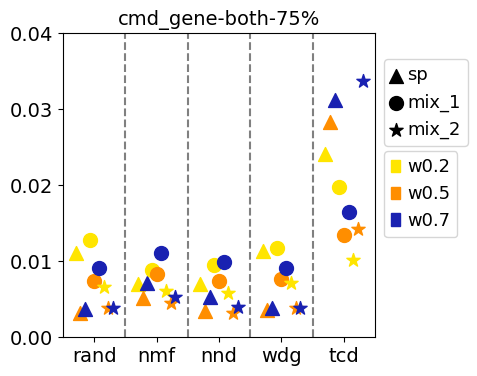

In [57]:
pattern = 'both'
sparse = '75'

sqpth = os.path.join(sd_pth, 'sp', pattern)
mqpth = os.path.join(sd_pth, 'mix_1', pattern)
m2qpth = os.path.join(sd_pth, 'mix_2', pattern)

pth_dict = {'sp':{'pth':os.path.join(sqpth,sparse),
               'd':16},
            'mix_1':{'pth':os.path.join(mqpth,sparse),
               'd':20}, 
           'mix_2':{'pth':os.path.join(m2qpth,sparse),
               'd':30}}

wXsparsity_scatter(indicator='cmd_gene', pth_dict=pth_dict, pic_pth=sd_pth,
                            checklist=[0.2,0.5,0.7], dname=pattern+'-'+sparse+'%',
                            plt_show=True, plt_save=True, 
                            initial=['rand','nmf','nndsvd','wdgsvd','tcdsvd'])